# 실습 예제
## knn regression 

## mglearn 설치(시간 다소 소요)

In [ ]:
!pip install mglearn # 이미 다운하셨던 분이라면 바로 import 해주시면 됩니다
import mglearn

## 1. 이웃 값에 의해서 어떻게 타깃이 변하는 지 관찰

### 이웃이 1일 때 

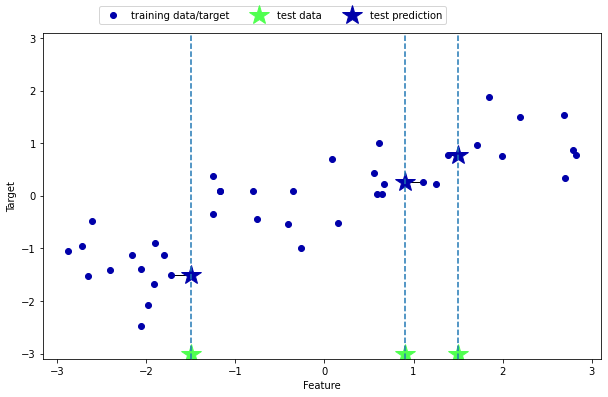

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

### 이웃이 3이랑 5인 경우를 확인하세요

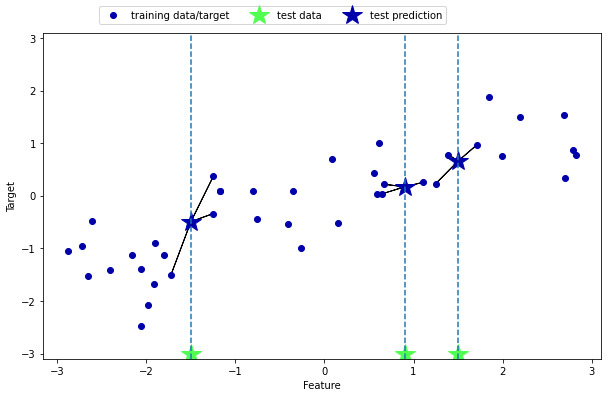

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

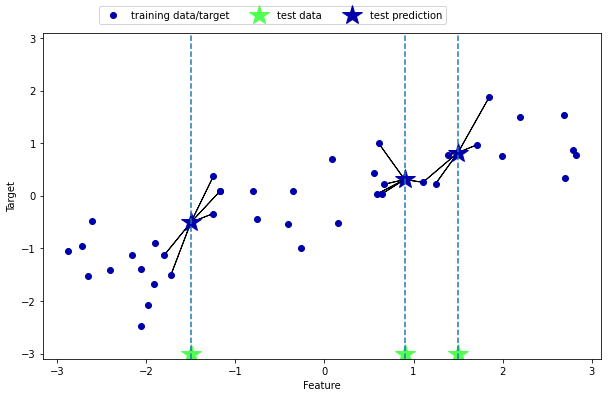

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

## 2. KNeighborsRegressor 

### KneighborsRegressor 함수를 불러와주세요

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

### 데이터셋을 만들어주세요. 변수 2개를 할당하면 됩니다 

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)

### 훈련 세트, 테스트 세트로 나눠주세요. random_state = 0 으로 지정

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 이웃의 수를 3으로 정하는 객체 생성

In [ ]:
knr3 = KNeighborsRegressor(n_neighbors=3)

### 모델을 학습시켜주세요

In [ ]:
knr3.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### 테스트값을 예측 함수에 적용 해주세요

In [ ]:
print("테스트 세트 예측:\n", knr3.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


### 모델의 점수를 확인해주세요

In [ ]:
knr3.score(X_test, y_test)

0.8344172446249605

### random_state의 값을 3으로 하고, 이웃의 수를 5로 정했을 경우 모델의 점수를 확인해주세요

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
knr5 = KNeighborsRegressor(n_neighbors=5)
knr5.fit(X_train, y_train)
print("테스트 세트 예측:\n", knr5.predict(X_test))
print(knr5.score(X_test, y_test))

테스트 세트 예측:
 [-1.12018569 -0.04480951  0.77519693 -0.07684735 -1.7738404  -0.35403931
  0.15220333  0.41353681 -1.7738404  -1.7738404 ]
0.5212840862106198


# 선형 회귀 : 집값 예측

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# boston housing 데이터 갖고 오기
housing = datasets.load_boston()

# feature 확인
print(housing.feature_names)

# 데이터셋 설명 확인
# - MEDV : 집값의 median (단위 : $1000)이 주로 target
print(housing.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hig

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# dataframe으로
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=['MEDV'])

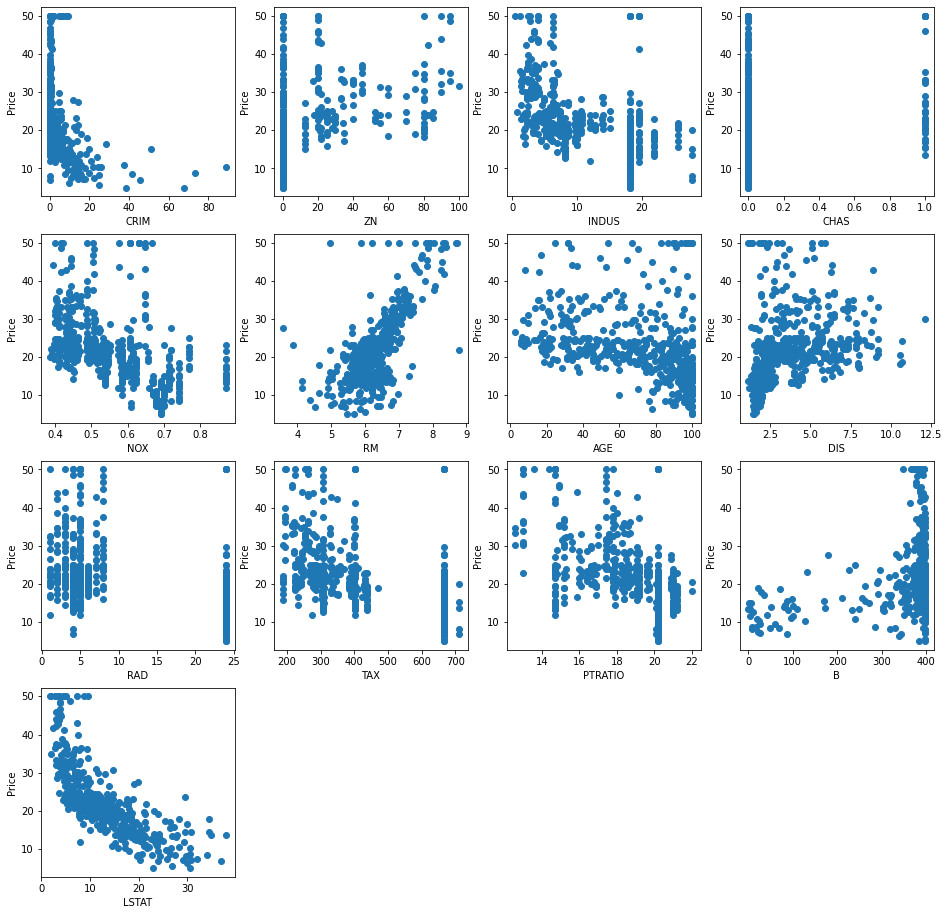

In [ ]:
# 각 feature와 집값의 관계 산점도로 표현 
# 평균 방 갯수인 RM이 집값과 강한 양의 상관관계를 보이고,
# 하위계층 비율인 LSTAT이 집값과 강한 음의 상관관계를 보인다

plt.figure(figsize=(16,16))

for i, feature in enumerate(housing.feature_names):
  plt.subplot(4, 4, i + 1)
  plt.scatter(X[feature], y)
  plt.xlabel(feature)
  plt.ylabel('Price')

In [ ]:
# RM feature만 X_room에 저장
X_room = X['RM']

In [ ]:
# train_test_split를 사용해서 학습 : 테스트 = 8 : 2로 나눈다
X_train, X_test, y_train, y_test = train_test_split(X_room, y, test_size = 0.2, random_state=0)

In [ ]:
# 선형 회귀 모델 생성
lr = LinearRegression()

# 학습 데이터를 이용해 모델 학습 (X : (sample 수, feature 수))
lr.fit(X_train[:, None], y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


LinearRegression()

In [ ]:
# 추정한 W값
print('W: 'lr.coef_)
# 추정한 b값
print('b: ', lr.intercept_)

[[9.37638431]]
[-36.47618963]


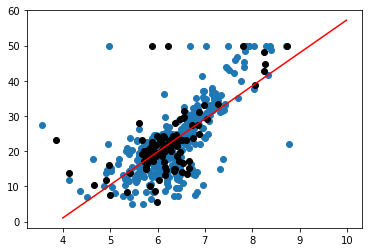

In [ ]:
# 학습 데이터 및 테스트 데이터 산점도를 그리고, 추정한 선형 모델을 표시한다.
plt.scatter(X_train, y_train)
point = np.arange(4,10,0.01)
plt.plot(point, lr.predict(point.reshape(-1,1)), c='r')
plt.scatter(X_test, y_test, c='black')

In [ ]:
# 학습시킨 모델로 예측 (X : (sample 수, feature 수))
y_pred = lr.predict(X_test[:, None])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
# mse를 통해서 테스트 데이터에서의 모델 성능 판단
mse = mean_squared_error(y_test, y_pred)
print('MSE : ', mse)

46.90735162739531


In [ ]:
# r2를 통해서 테스트 데이터에서의 모델 성능 판단
r2 = lr.score(X_test[:, None], y_test)
print('R2 : ', r2)

0.42394386816456286


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


# 경사하강법 구현

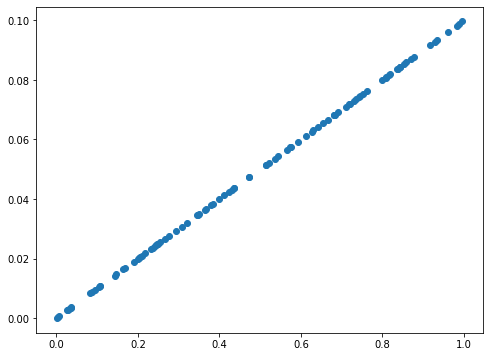

In [ ]:
#X, Y 생성 후 시각화
X = np.random.rand(100)
Y = 0.2 * X + 0.5

plt.figure(figsize=(8, 6))
plt.scatter(X, Y)
plt.show()

In [ ]:
#실제값, 예측값 그리는 함수 생성
def plot_prediction(pred, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y)
    plt.scatter(X, pred)
    plt.show()

###경사 하강법 구현

In [ ]:
#임의의 W, b 값 지정
W = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)

#학습률 지정
learning_rate = 0.7

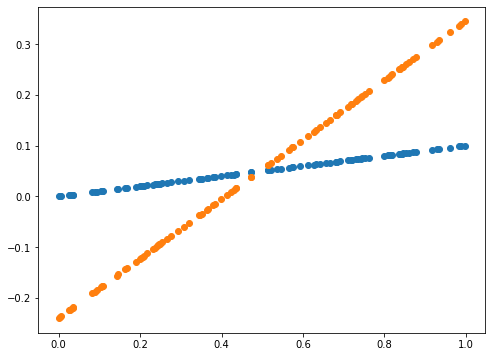

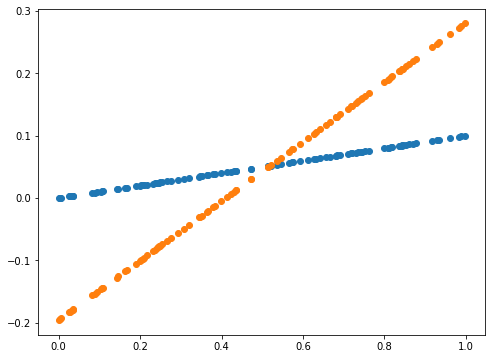

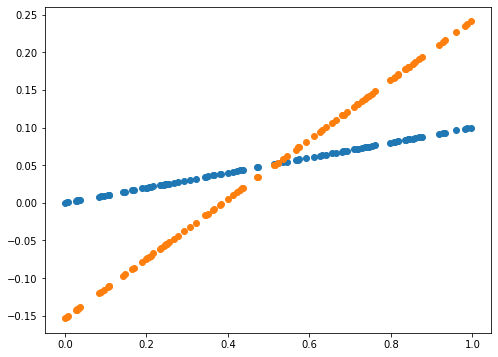

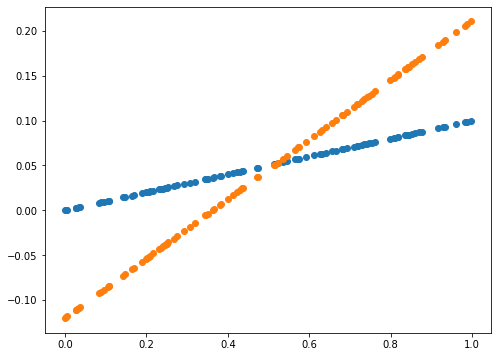

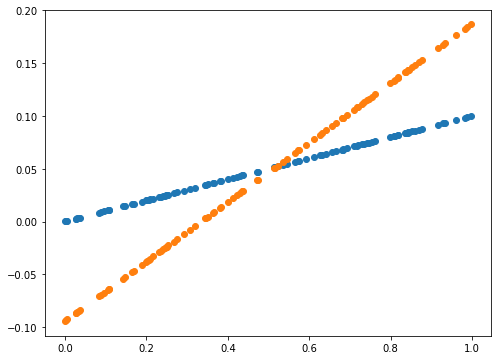

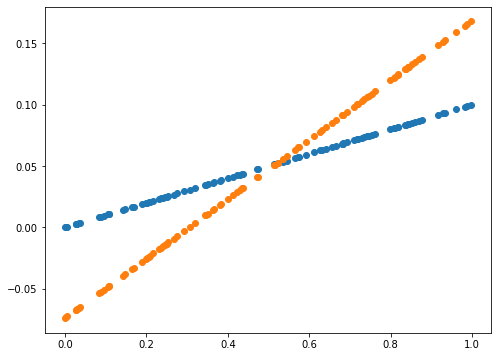

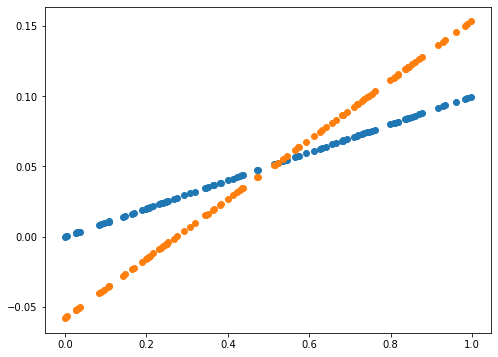

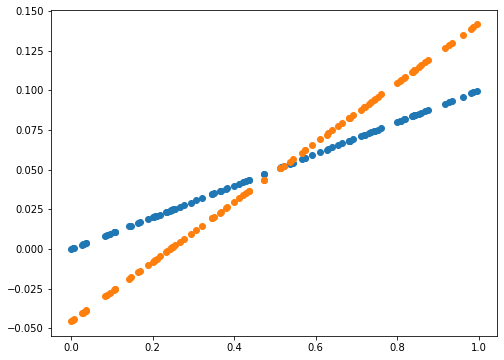

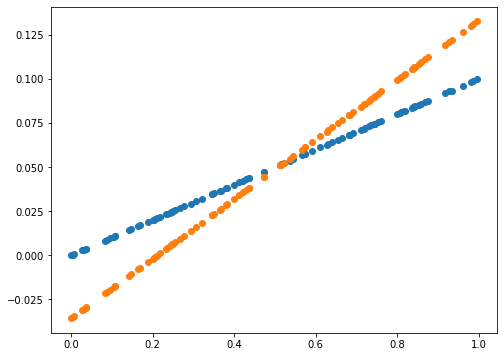

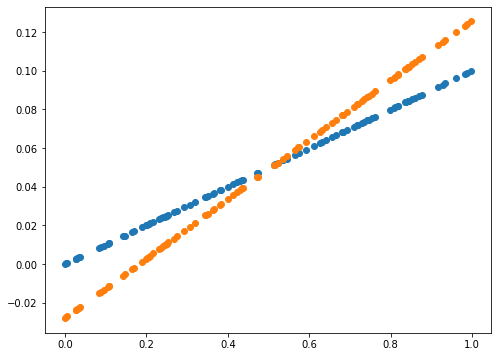

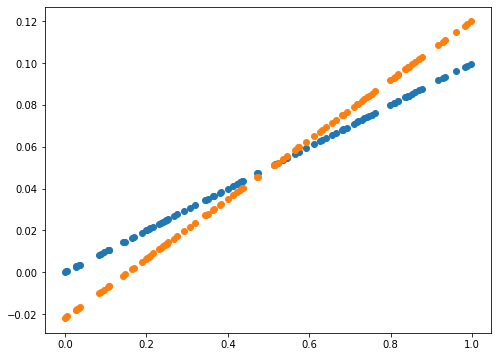

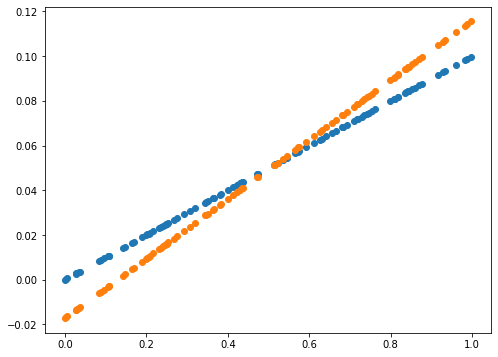

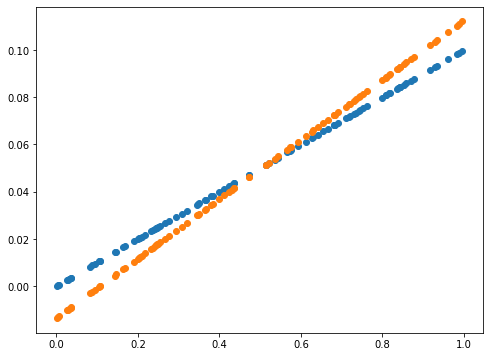

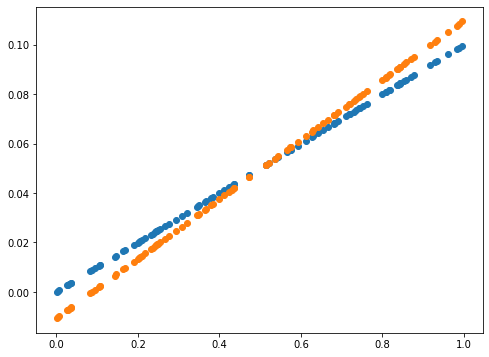

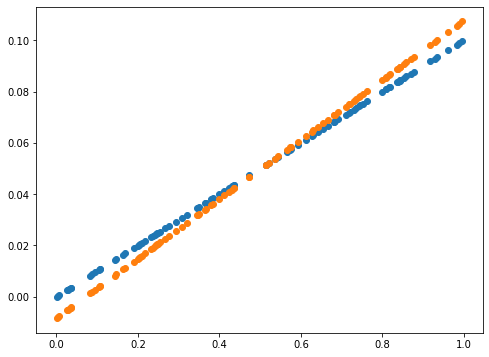

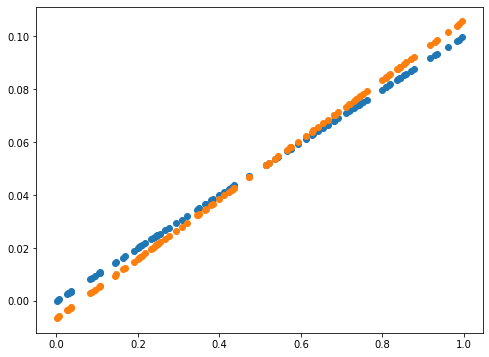

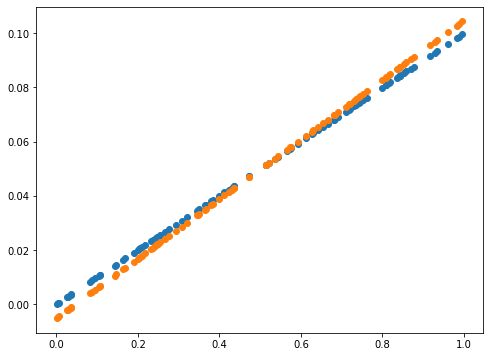

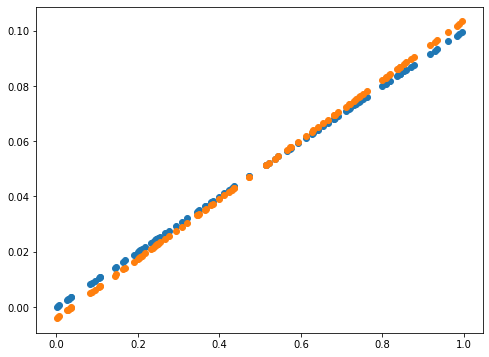

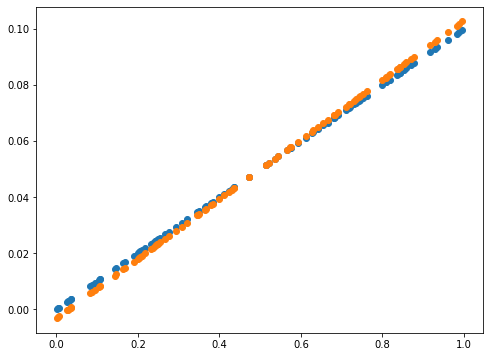

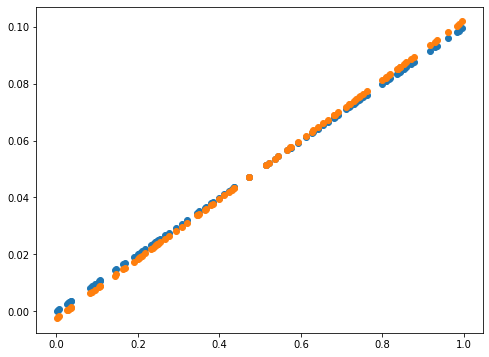

In [ ]:
#경사하강 반복
for epoch in range(100):
    Y_Pred = W * X + b

    error = np.abs(Y_Pred - Y).mean()
    if error < 0.001:
        break
    #gradient descent
    w_grad = ((Y_Pred - Y)*X).mean()
    b_grad = (Y_Pred - Y).mean()

    #W, b 값 갱신
    W = W - learning_rate * w_grad
    b = b - learning_rate * b_grad

    #반복 5번할 때마다 실제값, 예측값 그리기
    if epoch % 5 == 0:
        Y_Pred = W * X + b
        plot_prediction(Y_Pred, Y)
